##Importações básicas

In [17]:
import pandas as pd
import numpy as np

#Regressão

Na tarefa dessa semana, iremos explorar aplicações de modelos de regressão. Diferente de modelos de classificação, onde desejamos descobrir a qual classe pertence uma amostra com base nos outros dados fornecidos, os modelos de regressão nos retornam um valor numérico.

Realize a aplicação das técnicas apresentadas a seguir e, por fim, escreva uma breve conclusão comparando os resultados obtidos entre os modelos utilizando as diferentes métricas de avaliação.


Materiais de apoio:

*   https://ricardomatsumura.medium.com/aprendizado-supervisionado-regress%C3%A3o-363547528ce5
*   https://www.geeksforgeeks.org/regression-in-machine-learning/

## Baixar dataset

O conjunto utilizado nesta tarefa está disponível no seguinte link:

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

Pesquise como utilizar um conjunto de dados tabular disponibilizado no github. É uma tarefa bem simples, então você não deverá ter problemas.

Além disso, verifique a qualidade do dataset e veja se é necessário realizar alguma forma de tratamento de dados.

In [18]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y_columns = ['charges']
X = insurance[X_columns]
y = insurance[y_columns]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Verificando se existem linhas duplicadas para serem removidas

In [21]:
X_train.duplicated().sum()
x_test.duplicated().sum()

0

Verificando se existem dados faltantes

In [22]:
X_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Verificando se existem colunas constantes

In [23]:
colunas_constantes = [col for col in X_train.columns if X_train[col].nunique() == 1]
colunas_constantes

[]

Verificando se os dados precisam ser transformados

In [24]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

Convertendo váriaveis categóricas em numéricas, normalizando os dados para as colunas numéricas. Utilizando OneHotEncoder e ColumnTransformer para evitar vazamento de dados.

*   OneHotEncoder: Converte variáveis categóricas em representações binárias (one-hot encoding).
*  StandardScaler: Normaliza dados numéricos para terem média 0 e variância 1.
*  ColumnTransformer: Aplica diferentes transformações a colunas específicas de um DataFrame, garantindo que o pré-processamento seja consistente e evitando vazamento de dados ao ajustar transformações apenas no conjunto de treinamento e aplicá-las no conjunto de teste.




In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region']),
        ('num', StandardScaler(), ['age', 'bmi', 'children'])
    ])

X_train = preprocessor.fit_transform(X_train)
x_test = preprocessor.transform(x_test)

In [26]:
X_train = pd.DataFrame(X_train)
x_test = pd.DataFrame(x_test)

X_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

## Regressão Linear

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares



In [27]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

linear_regressor = linear_model.LinearRegression()
parameters = {
    'fit_intercept': [True, False],  # Testa a inclusão do termo de interceptação
    'positive': [True, False],  # Testa a imposição de coeficientes positivos
    'copy_X': [True, False]  # Testa a cópia dos dados de entrada
}

grid_search = GridSearchCV(estimator=linear_regressor, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_

predicted_linear_regressor = best_regressor.predict(x_test)
print(best_regressor)

LinearRegression(positive=True)


##SVR - Support Vector Regression

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/svm.html#regression


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_svr = grid_search.best_estimator_
predicted_svr = best_svr.predict(x_test)
print(best_svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVR(C=10.0, kernel='linear')


## MLP (sklearn)

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression



In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Definindo o regressor MLP
mlp_regressor = MLPRegressor(random_state=1)

# Parâmetros que você deseja testar
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Testa diferentes arquiteturas de camadas ocultas
    'activation': ['relu', 'tanh', 'logistic'],  # Testa diferentes funções de ativação
    'alpha': [0.0001, 0.001, 0.01],  # Testa diferentes valores de regularização L2
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_

predicted_mlp = best_regressor.predict(x_test)
print(best_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#Métricas de Avaliação

Devido à natureza distinta dos problemas e dos resultados obtidos em tarefas de classificação e regressão, as métricas utilizadas para avaliar a performance nesses dois tipos de tarefas são diferentes. Em tarefas de regressão, a saída do modelo é um valor contínuo, e as métricas ajudam a entender o quão próximas as previsões estão dos valores verdadeiros, além de identificar a magnitude dos erros de previsão.

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

*   https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

*   https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/

O link fornecido no inicio dessa tarefa, do professor Ricardo Araujo, também possui informações uteis sobre as métricas de avaliação.

O R2 Score é uma medida estatística que indica o quão bem o modelo de regressão se ajusta aos dados. Quanto mais próximo de 1, melhor é o ajuste do modelo aos dados.

In [30]:
from sklearn.metrics import r2_score

r2_linear = r2_score(y_test, predicted_linear_regressor)
r2_svr = r2_score(y_test, predicted_svr)
r2_mlp = r2_score(y_test, predicted_mlp)

print(f'R2 Score:')
print(f'Linear Regression: {r2_linear:.4f}')
print(f'SVR: {r2_svr:.4f}')
print(f'MLP: {r2_mlp:.4f}')

R2 Score
linearRegression: 0.7588103404197837
SVR: 0.023270285060835394
MLP: 0.7160599569478694


O MAE (Erro Médio Absoluto) Fornece uma medida direta da média dos erros absolutos, o que é útil para entender o erro médio esperado do modelo em unidades da variável de saída

In [32]:
from sklearn.metrics import mean_absolute_error

mae_linear = mean_absolute_error(y_test, predicted_linear_regressor)
mae_svr = mean_absolute_error(y_test, predicted_svr)
mae_mlp = mean_absolute_error(y_test, predicted_mlp)

print(f'\nMean Absolute Error (MAE):')
print(f'Linear Regression: {mae_linear:.4f}')
print(f'SVR: {mae_svr:.4f}')
print(f'MLP: {mae_mlp:.4f}')


Mean Absolute Error (MAE):
Linear Regression: 4005.7553
SVR: 5746.1372
MLP: 4633.7517


O MSE (Erro Quadrático Médio) calcula a média dos quadrados dos erros entre os valores previstos e os valores reais. Útil para comparar modelos, pois ele foca nos erros maiores devido ao quadrado.

In [33]:
from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_test, predicted_linear_regressor)
mse_svr = mean_squared_error(y_test, predicted_svr)
mse_mlp = mean_squared_error(y_test, predicted_mlp)

print(f'\nMean Squared Error (MSE):')
print(f'Linear Regression: {mse_linear:.4f}')
print(f'SVR: {mse_svr:.4f}')
print(f'MLP: {mse_mlp:.4f}')


Mean Squared Error (MSE):
Linear Regression: 33881641.7086
SVR: 137208229.8442
MLP: 39887094.7542


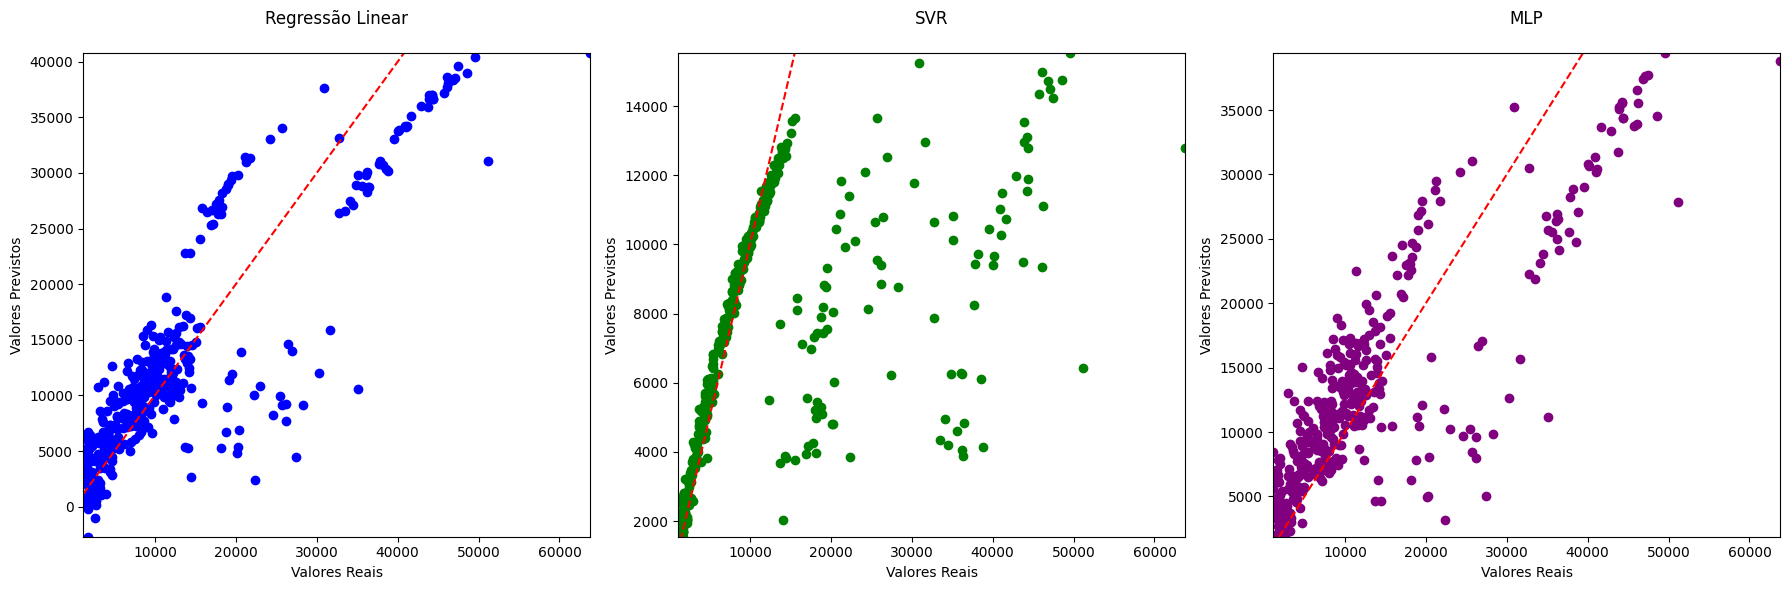

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Converter y_test para números (se necessário)
y_test = np.array(y_test, dtype=float)  # Convertendo para array de float

# Gráfico de dispersão para valores reais vs. valores previstos para cada modelo
plt.figure(figsize=(18, 6))

# Gráfico para Regressão Linear
plt.subplot(1, 3, 1)
plt.scatter(y_test, predicted_linear_regressor, color='blue')
plt.xlim(min(y_test) - 1, max(y_test) + 1)
plt.ylim(min(predicted_linear_regressor) - 1, max(predicted_linear_regressor) + 1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title(f'Regressão Linear\n')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

# Gráfico para SVR
plt.subplot(1, 3, 2)
plt.scatter(y_test, predicted_svr, color='green')
plt.xlim(min(y_test) - 1, max(y_test) + 1)
plt.ylim(min(predicted_svr) - 1, max(predicted_svr) + 1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title(f'SVR\n')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

# Gráfico para MLP
plt.subplot(1, 3, 3)
plt.scatter(y_test, predicted_mlp, color='purple')
plt.xlim(min(y_test) - 1, max(y_test) + 1)
plt.ylim(min(predicted_mlp) - 1, max(predicted_mlp) + 1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title(f'MLP\n')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.tight_layout()
plt.show()

#Conclusão







O modelo de regressão linear tem o melhor desempenho geral entre os três modelos, com um R2 Score mais alto e menores valores de MAE e MSE, indicando que está capturando melhor a relação entre as variáveis. Já SVR apresentou o pior desempenho, com baixo R2 Score e maiores valores de MAE e MSE, sugerindo que não está modelando bem a relação entre as variáveis. Enquanto que o MLP teve um desempenho intermediário, com um R2 Score razoável, mas com MAE e MSE um pouco mais altos em comparação com a regressão linear.

Isso fica mais fácil de visualizar no gráfico gerado, uma vez que na regressão linear e MLP os valores estão mais próximos da reta e no SVR é o gráfico com mais valores dispersos, apesar de ter alguns valores em cima da reta.

O modelo linear pode ter se saído melhor porque pode haver relações lineares entre os dados ou porque são utilizados poucos dados, enquanto o MLP consegue capturar relações complexas e não lineares, por isso seu desempenho bom também.